Cho [tập dữ liệu](https://raw.githubusercontent.com/Levytan/mis_hutech/refs/heads/master/D%E1%BB%AF%20li%E1%BB%87u/L%E1%BA%ADp%20tr%C3%ACnh%20n%C3%A2ng%20cao/titanic.csv) thông tin về hành khách và thủy thủ đoàn của chuyến tàu Titanic với những cột sau:
* `Titanic passenger`: tên
* `Status`: trạng thái, bao gồm `Victim` (nạn nhân), `Survivor` (sống sót) và `NaN`.
* `Home Country`: nơi sinh.
* `Age`: tuổi.
* `Crew or Passenger?`: hành khách (`Passenger`) hay thủy thủ đoàn (`Crew`).
* `Gender`: giới tính.
* `Class / Department`: hạng hành khách / bộ phận làm việc của thủy thủ đoàn.
* `Ticket Number`: Số vé
* `Fare Price`: giá vé, theo định dạng `£x ys zd`, trong đó x là số bảng, y là số shilling (1 shilling = 1/20 bảng), z là số penny (1 penny = 1/12 shilling = 1/240 bảng).




In [1]:
import pandas as pd
import seaborn as sns

#lưu ý, nếu sử dụng pandas phiên bản cũ hơn, kết quả có thể sẽ hơi khác
pd.__version__

'2.2.2'

In [2]:
#Đọc dữ liệu từ file titanic.csv
data = pd.read_csv('https://raw.githubusercontent.com/Levytan/mis_hutech/refs/heads/master/D%E1%BB%AF%20li%E1%BB%87u/L%E1%BA%ADp%20tr%C3%ACnh%20n%C3%A2ng%20cao/titanic.csv')
data.head()

,Titanic passager,Status,Home Country,Age,Crew or Passenger?,Gender,Class / Department,Ticket Number,Fare Price
0,"DE GRASSE, Mr J.",NaN,NaN,NaN,Passenger,Male,2nd Class,761,£1
1,"EVANS, Miss",NaN,NaN,NaN,Passenger,Female,2nd Class,88,£1
2,"MULLEN,",NaN,NaN,NaN,Passenger,Female,2nd Class,404,£1
3,"WOTTON, Mr Henry Swaffin",NaN,NaN,54.0,Passenger,Male,1st Class,86,£1 10s
4,"BRAND, Mr",NaN,NaN,NaN,Passenger,Male,1st Class,8,£1 10s


In [3]:
#Thống kê số nạn nhân trên 60 tuổi.
data[
    (data['Status'] == 'Victim') #nạn nhân
    & (data['Age'] > 60)         #trên 60 tuổi
].shape[0]

31

In [4]:
#Lấy thông tin những người sống sót dưới 20 tuổi
data[
    (data['Status'] == 'Victim') #người sống sót
    & (data['Age'] < 20)         #dưới 20 tuổi
].head()

,Titanic passager,Status,Home Country,Age,Crew or Passenger?,Gender,Class / Department,Ticket Number,Fare Price
21,"PENGELLY, Mr Frederick William",Victim,England,19.0,Passenger,Male,2nd Class,28665,£10 10s
22,"FILLBROOK, Mr Joseph Charles",Victim,England,18.0,Passenger,Male,2nd Class,15185,£10 10s
38,"MUDD, Mr Thomas Cupper",Victim,England,16.0,Passenger,Male,2nd Class,S.O./P.P 3,£10 10s
39,"ROGERS, Mr Reginald Harry",Victim,England,18.0,Passenger,Male,2nd Class,28004,£10 10s
44,"DAKIC, Mr Branko",Victim,NaN,19.0,Passenger,Male,3rd Class,349228,£10 3s 5d


In [5]:
#Thống kê số lượng người trên tàu theo 'Status' và  'Class / Department'.
#dùng groupby
data.groupby(['Status', 'Class / Department'], dropna = False)['Titanic passager'].count()

Status    Class / Department
Survivor  1st Class             201
          2nd Class             119
          3rd Class             180
          Deck Crew              43
          Engineering Crew       71
          Restaurant Staff        3
          Victualling Crew       94
Victim    1st Class             123
          2nd Class             166
          3rd Class             528
          Deck Crew              23
          Engineering Crew      253
          Restaurant Staff       66
          Victualling Crew      337
NaN       1st Class              26
          2nd Class               9
          Deck Crew              33
          Engineering Crew      179
          Victualling Crew        2
Name: Titanic passager, dtype: int64

In [6]:
#dùng pivot table
data.pivot_table(
    index = 'Class / Department',
    columns = 'Status',
    values = 'Titanic passager',
    aggfunc = pd.Series.count,
    dropna = False
)

Status,Survivor,Victim,NaN
Class / Department,,,
1st Class,201.0,123.0,26.0
2nd Class,119.0,166.0,9.0
3rd Class,180.0,528.0,NaN
Deck Crew,43.0,23.0,33.0
Engineering Crew,71.0,253.0,179.0
Restaurant Staff,3.0,66.0,NaN
Victualling Crew,94.0,337.0,2.0


In [7]:
#Lấy ra toàn bộ thông tin về các hành khách thành một dữ liệu riêng
passenger = data[data['Crew or Passenger?'] == 'Passenger']
passenger.head()

,Titanic passager,Status,Home Country,Age,Crew or Passenger?,Gender,Class / Department,Ticket Number,Fare Price
0,"DE GRASSE, Mr J.",NaN,NaN,NaN,Passenger,Male,2nd Class,761,£1
1,"EVANS, Miss",NaN,NaN,NaN,Passenger,Female,2nd Class,88,£1
2,"MULLEN,",NaN,NaN,NaN,Passenger,Female,2nd Class,404,£1
3,"WOTTON, Mr Henry Swaffin",NaN,NaN,54.0,Passenger,Male,1st Class,86,£1 10s
4,"BRAND, Mr",NaN,NaN,NaN,Passenger,Male,1st Class,8,£1 10s


In [8]:
#Thống kê số lượng hành khách theo hạng
passenger.groupby('Class / Department')['Titanic passager'].count()

,Titanic passager
Class / Department,
1st Class,350
2nd Class,294
3rd Class,708


<Axes: xlabel='Age', ylabel='Count'>

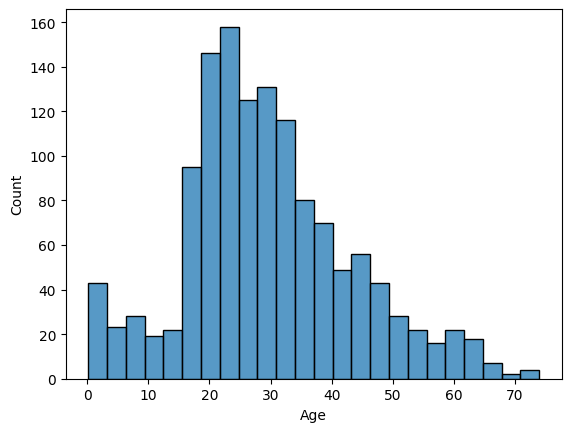

In [9]:
#Vẽ biểu đồ tần suất cho tuổi của các hành khách
sns.histplot(data = passenger, x = 'Age')

In [10]:
#Tính tỷ lệ còn sống của những người giới tính nữ, nếu trạng thái là NaN thì xem như là còn sống.
f = data[data['Gender'] == 'Female'] #lấy ra những người giới tính nữ
f[f['Status'] != 'Victim'].shape[0] / f.shape[0]

0.7420634920634921

In [11]:
#Tính tỷ lệ nạn nhân của từng hạng hành khách, nếu trạng thái là NaN thì xem như là còn sống.
#thống kê tình trạng nạn nhân
passenger_status = passenger.pivot_table(
    index = 'Class / Department',
    columns = 'Status',
    values = 'Titanic passager',
    aggfunc = pd.Series.count,
    dropna = False
)
passenger_status

Status,Survivor,Victim,NaN
Class / Department,,,
1st Class,201.0,123.0,26.0
2nd Class,119.0,166.0,9.0
3rd Class,180.0,528.0,NaN


In [12]:
#tính tỷ lệ nạn nhân
passenger_status.assign(
    victim_rate = passenger_status.Victim / passenger_status.sum(axis = 'columns')
)

Status,Survivor,Victim,NaN,victim_rate
Class / Department,,,,
1st Class,201.0,123.0,26.0,0.351429
2nd Class,119.0,166.0,9.0,0.564626
3rd Class,180.0,528.0,NaN,0.745763


In [13]:
#Chuyển đổi cột giá vé thành kiểu số
#hàm chuyển đổi
def to_money(s: str) -> float:
    '''
    Dùng để chuyển đổi chuỗi tiền dạng '£x ys zd' thành số (theo bảng).
    Quy ước: £1 = 20s = 240p
    '''
    money = 0
    if s == 'nan':      #chuỗi là nan
        return float('nan')
    for c in s.split(): #tách chuỗi theo khoảng trắng
        if '£' in c:    #c là số bảng
            money += int(c[1:])
        if 's' in c:    #c là số shilling
            money += int(c[:-1]) / 20
        if 'p' in c:    #c là số penny
            money += int(c[:-1]) / 240
    return money

to_money('£1 10s')

1.5

In [14]:
# chuyển đổi sang số
data = data.assign(
    Price = data['Fare Price'].apply(str).apply(to_money)
)

In [15]:
#bonus, nguyên mẫu của Rose DeWitt Bukater (trong phim Titanic) có tên là Beatrice Wood, tuy nhiên, nữ nghệ sĩ này chưa từng đặt chân lên Titanic
data[data['Titanic passager'].str.find('Beatrice Wood') > 0]

,Titanic passager,Status,Home Country,Age,Crew or Passenger?,Gender,Class / Department,Ticket Number,Fare Price,Price
